# Hand Written 

## import library

In [1]:
# example of loading the mnist dataset
from keras.datasets.mnist import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


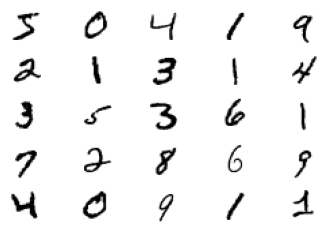

In [2]:
# example of loading the mnist dataset
from keras.datasets.mnist import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(25):
        # define subplot
        pyplot.subplot(5, 5, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

In [3]:
!pip install keras-rectified-adam


In [4]:
# example of defining the discriminator model
from keras.models import Sequential
from keras_radam import RAdam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = RAdam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

C:\Users\PC GAMER\anaconda3\lib\site-packages\keras_radam\optimizer_v2.py:59: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RAdam, self).__init__(name, **kwargs)


In [5]:
# example of training the discriminator model on real and random mnist images
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras_radam import RAdam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = RAdam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(28 * 28 * n_samples)
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, 28, 28, 1))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

# train the discriminator model
def train_discriminator(model, dataset, n_iter=1000, n_batch=256):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=40% fake=68%
>2 real=37% fake=66%
>3 real=51% fake=66%
>4 real=37% fake=70%
>5 real=37% fake=70%
>6 real=40% fake=67%
>7 real=45% fake=64%
>8 real=51% fake=67%
>9 real=43% fake=68%
>10 real=37% fake=70%
>11 real=41% fake=79%
>12 real=37% fake=74%
>13 real=30% fake=81%
>14 real=41% fake=80%
>15 real=44% fake=77%
>16 real=49% fake=80%
>17 real=41% fake=84%
>18 real=31% fake=83%
>19 real=40% fake=82%
>20 real=52% fake=85%
>21 real=42% fake=85%
>22 real=41% fake=85%
>23 real=38% fake=92%
>24 real=41% fake=91%
>25 real=40% fake=94%
>26 real=44% fake=91%
>27 real=37% fake=93%
>28 real=45% fake=93%
>29 real=35% fake=95%
>30 real=39% fake=98%
>31 real=37% fake=98%
>32 real=40% fake=98%
>33 real=41% fake=95%
>34 real=41% fake=99%
>35 real=45% fake=98%
>36 real=38% fake=99%
>37 real=34% fake=99%
>38 real=43% fake=100%
>39 real=41% fake=99%
>40 real=36% fake=100%
>41 real=48% fake=98%
>42 real=44% fake=100%
>43 real=41% fake=100%
>44 real=46% fake=100%
>45 real=37% fake=100%
>46 real=51% 

>341 real=100% fake=100%
>342 real=100% fake=100%
>343 real=100% fake=100%
>344 real=100% fake=100%
>345 real=100% fake=100%
>346 real=100% fake=100%
>347 real=100% fake=100%
>348 real=100% fake=100%
>349 real=100% fake=100%
>350 real=100% fake=100%
>351 real=100% fake=100%
>352 real=100% fake=100%
>353 real=100% fake=100%
>354 real=100% fake=100%
>355 real=100% fake=100%
>356 real=100% fake=100%
>357 real=100% fake=100%
>358 real=100% fake=100%
>359 real=100% fake=100%
>360 real=100% fake=100%
>361 real=100% fake=100%
>362 real=100% fake=100%
>363 real=100% fake=100%
>364 real=100% fake=100%
>365 real=100% fake=100%
>366 real=100% fake=100%
>367 real=100% fake=100%
>368 real=100% fake=100%
>369 real=100% fake=100%
>370 real=100% fake=100%
>371 real=100% fake=100%
>372 real=100% fake=100%
>373 real=100% fake=100%
>374 real=100% fake=100%
>375 real=100% fake=100%
>376 real=100% fake=100%
>377 real=100% fake=100%
>378 real=100% fake=100%
>379 real=100% fake=100%
>380 real=100% fake=100%


>669 real=100% fake=100%
>670 real=100% fake=100%
>671 real=100% fake=100%
>672 real=100% fake=100%
>673 real=100% fake=100%
>674 real=100% fake=100%
>675 real=100% fake=100%
>676 real=100% fake=100%
>677 real=100% fake=100%
>678 real=100% fake=100%
>679 real=100% fake=100%
>680 real=100% fake=100%
>681 real=100% fake=100%
>682 real=100% fake=100%
>683 real=100% fake=100%
>684 real=100% fake=100%
>685 real=100% fake=100%
>686 real=100% fake=100%
>687 real=100% fake=100%
>688 real=100% fake=100%
>689 real=100% fake=100%
>690 real=100% fake=100%
>691 real=100% fake=100%
>692 real=100% fake=100%
>693 real=100% fake=100%
>694 real=100% fake=100%
>695 real=100% fake=100%
>696 real=100% fake=100%
>697 real=100% fake=100%
>698 real=100% fake=100%
>699 real=100% fake=100%
>700 real=100% fake=100%
>701 real=100% fake=100%
>702 real=100% fake=100%
>703 real=100% fake=100%
>704 real=100% fake=100%
>705 real=100% fake=100%
>706 real=100% fake=100%
>707 real=100% fake=100%
>708 real=100% fake=100%


>1000 real=100% fake=100%
